In [ ]:
from PIL import Image
import cv2
import numpy as np
import pandas as pd 
import tensorflow as tf

In [ ]:
!pip install paddlepaddle-gpu==2.3.0.post110 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

# pdf2image

## Installation

In [ ]:
!pip install pdf2image
!apt-get update
!apt-get install poppler-utils

## 변환(Conversion)

In [ ]:
from pdf2image import convert_from_path

In [ ]:
images = convert_from_path('/content/KCI_FI002718081.pdf')

In [ ]:
!mkdir Test

In [ ]:
#pdf 파일 각페이지를 jpg/JPEG로 저장 
for i in range(len(images)):
  images[i].save('Test/page'+str(i)+'.jpg', 'JPEG')

# Layout

## 설치 (paddleOCR, layoutparser)

In [ ]:
#!python3 -m pip install paddlepaddle-gpu
!pip install "paddleocr>=2.0.1"
!pip install protobuf==3.20.0
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

In [ ]:
!wget https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl
!pip install -U layoutparser-0.0.0-py3-none-any.whl

## 표 추출(Table Extraction)

In [ ]:
import cv2
import layoutparser as lp

# Convert the image from BGR (cv2 default loading style)
# to RGB
image = cv2.imread("/content/Test/page3.jpg")
image = image[..., ::-1]

# load model
model = lp.PaddleDetectionLayoutModel(config_path="lp://PubLayNet/ppyolov2_r50vd_dcn_365e_publaynet/config",
                                threshold=0.5,
                                label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"},
                                enforce_cpu=False,
                                enable_mkldnn=True)#math kernel library
# detect
layout = model.detect(image)

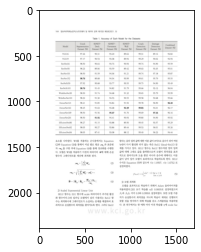

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [ ]:
layout

Layout(_blocks=[TextBlock(block=Rectangle(x_1=176.20626831054688, y_1=1416.7850341796875, x_2=819.1768798828125, y_2=1612.2164306640625), text=None, id=None, type=Text, parent=None, next=None, score=0.9217627644538879), TextBlock(block=Rectangle(x_1=179.60009765625, y_1=344.3229675292969, x_2=1516.93603515625, y_2=1366.3338623046875), text=None, id=None, type=Table, parent=None, next=None, score=0.8920433521270752), TextBlock(block=Rectangle(x_1=585.2099609375, y_1=296.04791259765625, x_2=1112.599365234375, y_2=329.0098876953125), text=None, id=None, type=Text, parent=None, next=None, score=0.8665440678596497), TextBlock(block=Rectangle(x_1=881.4356689453125, y_1=1905.8953857421875, x_2=1520.4378662109375, y_2=2148.665771484375), text=None, id=None, type=Text, parent=None, next=None, score=0.8359602093696594), TextBlock(block=Rectangle(x_1=880.256103515625, y_1=1415.834716796875, x_2=1521.389892578125, y_2=1725.28515625), text=None, id=None, type=Text, parent=None, next=None, score=0.8

In [ ]:
x_1=0
y_1=0
x_2=0
y_2=0

for l in layout:
  #print(l)
  if l.type == 'Table':
    x_1 = int(l.block.x_1)
    print(l.block.x_1)
    y_1 = int(l.block.y_1)
    x_2 = int(l.block.x_2)
    y_2 = int(l.block.y_2)
    
    break

179.6001


In [ ]:
print(x_1,y_1,x_2,y_2)

179 344 1516 1366


In [ ]:
im = cv2.imread('/content/Test/page3.jpg')

In [ ]:
cv2.imwrite('ext_im.jpg', im[y_1:y_2,x_1:x_2])

True

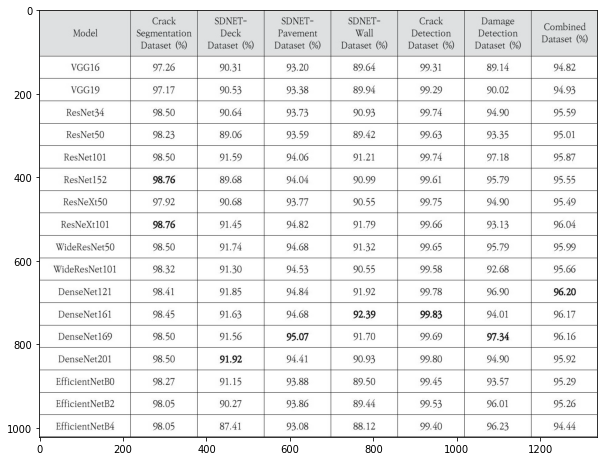

In [ ]:
ext_img = cv2.imread('/content/ext_im.jpg')
plt.figure(figsize=(10,10))
plt.imshow(ext_img )

# 글자 감지 및 인식(Text Detection and Recognition)

In [ ]:
from paddleocr import PaddleOCR, draw_ocr

In [ ]:
ocr = PaddleOCR(lang='en')
image_path = '/content/ext_im.jpg'
image_cv = cv2.imread(image_path)
image_height = image_cv.shape[0]
image_width = image_cv.shape[1]
output = ocr.ocr(image_path)[0]

[2023/01/02 06:31:52] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

In [ ]:
print(image_height,image_width)

1022 1337


In [ ]:
print(output)
# 해당 영역에 있는 모든 텍스트 감지, 인식

[[[[269.0, 11.0], [331.0, 11.0], [331.0, 37.0], [269.0, 37.0]], ('Crack', 0.9974668622016907)], [[[418.0, 12.0], [500.0, 12.0], [500.0, 37.0], [418.0, 37.0]], ('SDNET-', 0.9964353442192078)], [[[578.0, 12.0], [663.0, 12.0], [663.0, 36.0], [578.0, 36.0]], ('SDNET-', 0.995093584060669)], [[[738.0, 12.0], [820.0, 12.0], [820.0, 37.0], [738.0, 37.0]], ('SDNET-', 0.9967150092124939)], [[[908.0, 11.0], [974.0, 11.0], [974.0, 37.0], [908.0, 37.0]], ('Crack', 0.9973966479301453)], [[[1055.0, 9.0], [1144.0, 14.0], [1142.0, 42.0], [1054.0, 37.0]], ('Damage', 0.9972259998321533)], [[[1207.0, 26.0], [1313.0, 26.0], [1313.0, 51.0], [1207.0, 51.0]], ('Combined', 0.9975548982620239)], [[[78.0, 42.0], [143.0, 42.0], [143.0, 67.0], [78.0, 67.0]], ('Model', 0.9983161687850952)], [[[233.0, 43.0], [368.0, 43.0], [368.0, 67.0], [233.0, 67.0]], ('Segmentation', 0.9979457855224609)], [[[432.0, 42.0], [489.0, 42.0], [489.0, 67.0], [432.0, 67.0]], ('Deck', 0.9973151683807373)], [[[570.0, 43.0], [670.0, 43.0], 

In [ ]:
output[0]

[[[269.0, 11.0], [331.0, 11.0], [331.0, 37.0], [269.0, 37.0]],
 ('Crack', 0.9974668622016907)]

In [ ]:
for out in output:
  print(out)

In [ ]:
boxes = [line[0] for line in output]
print(boxes)

[[[269.0, 11.0], [331.0, 11.0], [331.0, 37.0], [269.0, 37.0]], [[418.0, 12.0], [500.0, 12.0], [500.0, 37.0], [418.0, 37.0]], [[578.0, 12.0], [663.0, 12.0], [663.0, 36.0], [578.0, 36.0]], [[738.0, 12.0], [820.0, 12.0], [820.0, 37.0], [738.0, 37.0]], [[908.0, 11.0], [974.0, 11.0], [974.0, 37.0], [908.0, 37.0]], [[1055.0, 9.0], [1144.0, 14.0], [1142.0, 42.0], [1054.0, 37.0]], [[1207.0, 26.0], [1313.0, 26.0], [1313.0, 51.0], [1207.0, 51.0]], [[78.0, 42.0], [143.0, 42.0], [143.0, 67.0], [78.0, 67.0]], [[233.0, 43.0], [368.0, 43.0], [368.0, 67.0], [233.0, 67.0]], [[432.0, 42.0], [489.0, 42.0], [489.0, 67.0], [432.0, 67.0]], [[570.0, 43.0], [670.0, 43.0], [670.0, 67.0], [570.0, 67.0]], [[753.0, 42.0], [805.0, 38.0], [807.0, 65.0], [755.0, 69.0]], [[890.0, 43.0], [989.0, 43.0], [989.0, 67.0], [890.0, 67.0]], [[1049.0, 42.0], [1148.0, 42.0], [1148.0, 65.0], [1049.0, 65.0]], [[1202.0, 57.0], [1317.0, 55.0], [1318.0, 80.0], [1202.0, 82.0]], [[241.0, 72.0], [358.0, 72.0], [358.0, 96.0], [241.0, 96

In [ ]:
boxes = [line[0] for line in output]
texts = [line[1][0] for line in output]
probabilities = [line[1][1] for line in output]

In [ ]:
image_boxes = image_cv.copy()

In [ ]:
for box in boxes:
  # 각 텍스트에 box 
  cv2.rectangle(image_boxes, (int(box[0][0]),int(box[0][1])), (int(box[2][0]),int(box[2][1])),(0,0,255),1)

In [ ]:
cv2.imwrite('detections.jpg', image_boxes)

True

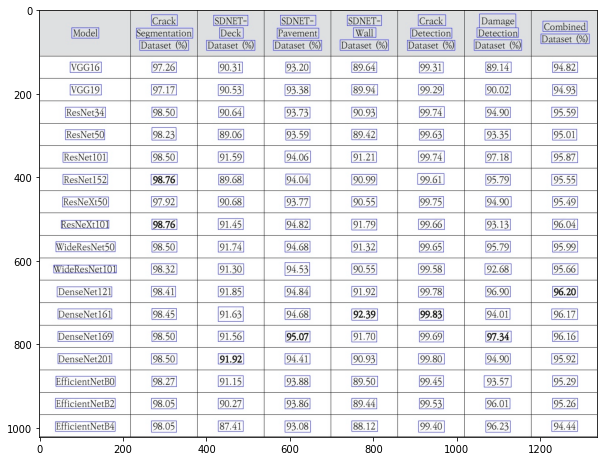

In [ ]:
det_img = cv2.imread('/content/detections.jpg')
plt.figure(figsize=(10,10))
plt.imshow(det_img)

In [ ]:
for box,text in zip(boxes,texts):
  cv2.rectangle(image_boxes, (int(box[0][0]),int(box[0][1])), (int(box[2][0]),int(box[2][1])),(0,0,255),1)
  
  # 텍스트 추가 
  cv2.putText(image_boxes, text,(int(box[0][0]),int(box[0][1])),cv2.FONT_HERSHEY_SIMPLEX,1,(222,0,0),1)

In [ ]:
cv2.imwrite('detections.jpg', image_boxes)

True

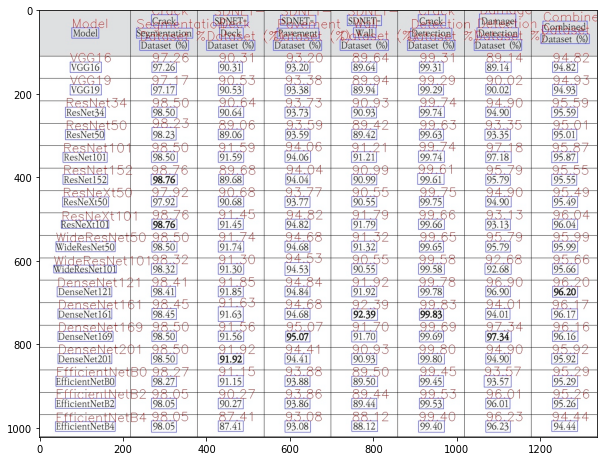

In [ ]:
det_img = cv2.imread('/content/detections.jpg')
plt.figure(figsize=(10,10))
plt.imshow(det_img)

# Reconstruction

## Get Horizontal and Vertical Lines

In [ ]:
im = image_cv.copy()

In [ ]:
# 수평, 수직 정의 
horiz_boxes = []
vert_boxes = []

for box in boxes:
  x_h, x_v = 0,int(box[0][0])

In [ ]:
boxes[0]

[[269.0, 11.0], [331.0, 11.0], [331.0, 37.0], [269.0, 37.0]]

In [ ]:
# 수평, 수직 정의 
horiz_boxes = []
vert_boxes = []

for box in boxes:
  x_h, x_v = 0,int(box[0][0])
  y_h, y_v = int(box[0][1]),0
  
  # 수평, 수직의 너비, 높이 
  width_h,width_v = image_width, int(box[2][0]-box[0][0])
  height_h,height_v = int(box[2][1]-box[0][1]),image_height

  # 추가
  horiz_boxes.append([x_h,y_h,x_h+width_h,y_h+height_h])
  vert_boxes.append([x_v,y_v,x_v+width_v,y_v+height_v])

  cv2.rectangle(im,(x_h,y_h), (x_h+width_h,y_h+height_h),(0,0,255),1)
  cv2.rectangle(im,(x_v,y_v), (x_v+width_v,y_v+height_v),(0,255,0),1)
  

In [ ]:
cv2.imwrite('horiz_vert.jpg',im)

True

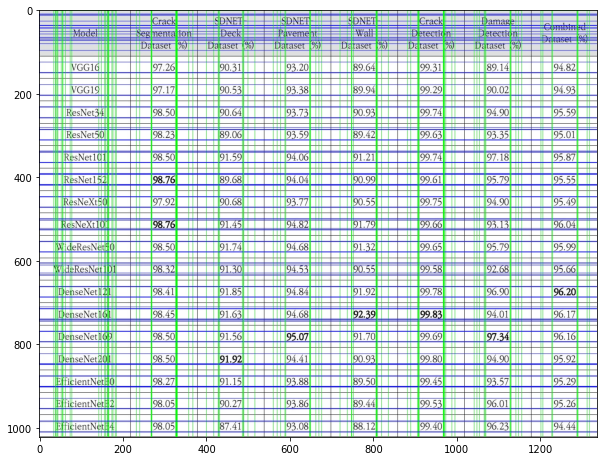

In [ ]:
horiz_vert = cv2.imread('/content/horiz_vert.jpg')
plt.figure(figsize=(10,10))
plt.imshow(horiz_vert)

## 중복 선 정리(Non-Max Suppression)

In [ ]:
horiz_out = tf.image.non_max_suppression(
    horiz_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [ ]:
horiz_lines = np.sort(np.array(horiz_out))
print(horiz_lines)

[  0   7  15  25  36  41  50  56  63  76  80  90 100 107 114 122 131 140
 146 150]


In [ ]:
im_nms = image_cv.copy()

In [ ]:
for val in horiz_lines:
  cv2.rectangle(im_nms, (int(horiz_boxes[val][0]),int(horiz_boxes[val][1])), (int(horiz_boxes[val][2]),int(horiz_boxes[val][3])),(0,0,255),1)
  

In [ ]:
cv2.imwrite('im_nms.jpg',im_nms)

True

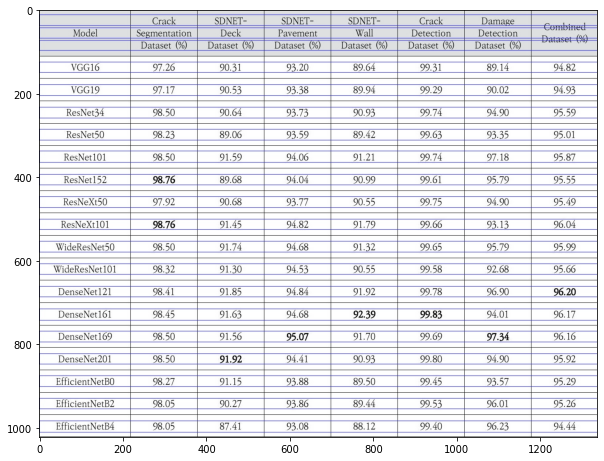

In [ ]:
im_nms = cv2.imread('/content/im_nms.jpg')
plt.figure(figsize=(10,10))
plt.imshow(im_nms)

In [ ]:
vert_out = tf.image.non_max_suppression(
    vert_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [ ]:
print(vert_out)

tf.Tensor([ 25  90  92  63 150 152 155  37], shape=(8,), dtype=int32)


In [ ]:
vert_lines = np.sort(np.array(vert_out))
print(vert_lines)

[ 25  37  63  90  92 150 152 155]


In [ ]:
for val in vert_lines:
  cv2.rectangle(im_nms, (int(vert_boxes[val][0]),int(vert_boxes[val][1])), (int(vert_boxes[val][2]),int(vert_boxes[val][3])),(255,0,0),1)
  

In [ ]:
cv2.imwrite('im_nms.jpg',im_nms)

True

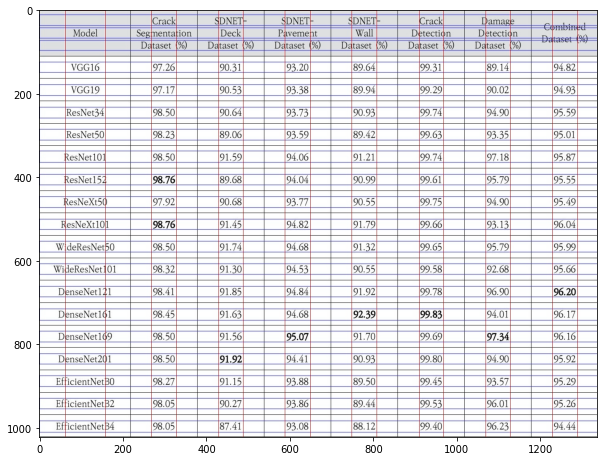

In [ ]:
im_nms = cv2.imread('/content/im_nms.jpg')
plt.figure(figsize=(10,10))
plt.imshow(im_nms)

## Convert to CSV

In [ ]:
out_array = [["" for i in range(len(vert_lines))] for j in range(len(horiz_lines))]
print(np.array(out_array).shape)
print(out_array)

(20, 8)
[['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '']]


In [ ]:
unordered_boxes = []

for i in vert_lines:
  print(vert_boxes[i])
  unordered_boxes.append(vert_boxes[i][0])

[749, 0, 809, 1022]
[63, 0, 159, 1022]
[430, 0, 489, 1022]
[911, 0, 969, 1022]
[1230, 0, 1290, 1022]
[269, 0, 329, 1022]
[589, 0, 650, 1022]
[1070, 0, 1129, 1022]


In [ ]:
ordered_boxes = np.argsort(unordered_boxes)
print(ordered_boxes)

[1 5 2 6 0 3 7 4]


In [ ]:
def intersection(box_1, box_2):
  return [box_2[0], box_1[1],box_2[2], box_1[3]]

In [ ]:
def iou(box_1, box_2):

  x_1 = max(box_1[0], box_2[0])
  y_1 = max(box_1[1], box_2[1])
  x_2 = min(box_1[2], box_2[2])
  y_2 = min(box_1[3], box_2[3])

  inter = abs(max((x_2 - x_1, 0)) * max((y_2 - y_1), 0))
  if inter == 0:
      return 0
      
  box_1_area = abs((box_1[2] - box_1[0]) * (box_1[3] - box_1[1]))
  box_2_area = abs((box_2[2] - box_2[0]) * (box_2[3] - box_2[1]))
  
  return inter / float(box_1_area + box_2_area - inter)

In [ ]:
for i in range(len(horiz_lines)):
  for j in range(len(vert_lines)):
    resultant = intersection(horiz_boxes[horiz_lines[i]], vert_boxes[vert_lines[ordered_boxes[j]]] )

    for b in range(len(boxes)):
      the_box = [boxes[b][0][0],boxes[b][0][1],boxes[b][2][0],boxes[b][2][1]]
      if(iou(resultant,the_box)>0.1):
        out_array[i][j] = texts[b]

In [ ]:
out_array=np.array(out_array)

In [ ]:
out_array

array([['', 'Crack', 'SDNET-', 'SDNET-', 'SDNET-', 'Crack', 'Damage',
        'Combined'],
       ['Model', 'Segmentation', 'Deck', 'Pavement', 'Wall', 'Detection',
        'Detection', 'Dataset (%)'],
       ['', 'Dataset %', 'Dataset (%)', 'Dataset (%)', 'Dataset (%)',
        'Dataset %)', 'Dataset %)', 'Dataset (%)'],
       ['VGG16', '97.26', '90.31', '93.20', '89.64', '99.31', '89.14',
        '94.82'],
       ['VGG19', '97.17', '90.53', '93.38', '89.94', '99.29', '90.02',
        '94.93'],
       ['ResNet34', '98.50', '90.64', '93.73', '90.93', '99.74', '94.90',
        '95.59'],
       ['ResNet50', '98.23', '89.06', '93.59', '89.42', '99.63', '93.35',
        '95.01'],
       ['ResNet101', '98.50', '91.59', '94.06', '91.21', '99.74',
        '97.18', '95.87'],
       ['ResNet152', '98.76', '89.68', '94.04', '90.99', '99.61',
        '95.79', '95.55'],
       ['ResNeXt50', '97.92', '90.68', '93.77', '90.55', '99.75',
        '94.90', '95.49'],
       ['ResNeXt101', '98.76', '91.

In [ ]:
pd.DataFrame(out_array).to_csv('sample.csv')

In [ ]:
df_csv = pd.read_csv('/content/sample.csv')
df_csv

,Unnamed: 0,0,1,2,3,4,5,6,7
0,0,NaN,Crack,SDNET-,SDNET-,SDNET-,Crack,Damage,Combined
1,1,Model,Segmentation,Deck,Pavement,Wall,Detection,Detection,Dataset (%)
2,2,NaN,Dataset %,Dataset (%),Dataset (%),Dataset (%),Dataset %),Dataset %),Dataset (%)
3,3,VGG16,97.26,90.31,93.20,89.64,99.31,89.14,94.82
4,4,VGG19,97.17,90.53,93.38,89.94,99.29,90.02,94.93
5,5,ResNet34,98.50,90.64,93.73,90.93,99.74,94.90,95.59
6,6,ResNet50,98.23,89.06,93.59,89.42,99.63,93.35,95.01
7,7,ResNet101,98.50,91.59,94.06,91.21,99.74,97.18,95.87
8,8,ResNet152,98.76,89.68,94.04,90.99,99.61,95.79,95.55
9,9,ResNeXt50,97.92,90.68,93.77,90.55,99.75,94.90,95.49


## Merging Cells

In [ ]:
current_bank=['']*len(out_array[0,:])
print(current_bank)

['', '', '', '', '', '', '', '']


In [ ]:
def empty(arr):
  for i in arr:
    if i=='':
      return True
  return False

In [ ]:
cleaned_array=[]

In [ ]:
for i in range(len(out_array)):
  if not empty(out_array[i]):
    current_bank=[out_array[i][j] for j in range(len(out_array[i]))]
    cleaned_array.append(current_bank)
    not_empty=True
  else:
    for j in range(len(out_array[i])):
      current_bank[j]+=' '+out_array[i][j]
    print('-->',current_bank)
cleaned_array=np.array(cleaned_array)
print(cleaned_array)

--> [' ', ' Crack', ' SDNET-', ' SDNET-', ' SDNET-', ' Crack', ' Damage', ' Combined']
--> ['Model ', 'Segmentation Dataset %', 'Deck Dataset (%)', 'Pavement Dataset (%)', 'Wall Dataset (%)', 'Detection Dataset %)', 'Detection Dataset %)', 'Dataset (%) Dataset (%)']
[['Model ' 'Segmentation Dataset %' 'Deck Dataset (%)'
  'Pavement Dataset (%)' 'Wall Dataset (%)' 'Detection Dataset %)'
  'Detection Dataset %)' 'Dataset (%) Dataset (%)']
 ['VGG16' '97.26' '90.31' '93.20' '89.64' '99.31' '89.14' '94.82']
 ['VGG19' '97.17' '90.53' '93.38' '89.94' '99.29' '90.02' '94.93']
 ['ResNet34' '98.50' '90.64' '93.73' '90.93' '99.74' '94.90' '95.59']
 ['ResNet50' '98.23' '89.06' '93.59' '89.42' '99.63' '93.35' '95.01']
 ['ResNet101' '98.50' '91.59' '94.06' '91.21' '99.74' '97.18' '95.87']
 ['ResNet152' '98.76' '89.68' '94.04' '90.99' '99.61' '95.79' '95.55']
 ['ResNeXt50' '97.92' '90.68' '93.77' '90.55' '99.75' '94.90' '95.49']
 ['ResNeXt101' '98.76' '91.45' '94.82' '91.79' '99.66' '93.13' '96.04']


In [ ]:
pd.DataFrame(cleaned_array).to_csv('cleaned.csv')

In [ ]:
df_csv2 = pd.read_csv('/content/cleaned.csv')
df_csv2

,Unnamed: 0,0,1,2,3,4,5,6,7
0,0,Model,Segmentation Dataset %,Deck Dataset (%),Pavement Dataset (%),Wall Dataset (%),Detection Dataset %),Detection Dataset %),Dataset (%) Dataset (%)
1,1,VGG16,97.26,90.31,93.20,89.64,99.31,89.14,94.82
2,2,VGG19,97.17,90.53,93.38,89.94,99.29,90.02,94.93
3,3,ResNet34,98.50,90.64,93.73,90.93,99.74,94.90,95.59
4,4,ResNet50,98.23,89.06,93.59,89.42,99.63,93.35,95.01
5,5,ResNet101,98.50,91.59,94.06,91.21,99.74,97.18,95.87
6,6,ResNet152,98.76,89.68,94.04,90.99,99.61,95.79,95.55
7,7,ResNeXt50,97.92,90.68,93.77,90.55,99.75,94.90,95.49
8,8,ResNeXt101,98.76,91.45,94.82,91.79,99.66,93.13,96.04
9,9,WideResNet50,98.50,91.74,94.68,91.32,99.65,95.79,95.99
